In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('heart.csv')
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [ ]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [ ]:
df=df.dropna()

## Categorical Variable 엔코딩

In [ ]:
y = df.pop('AHD')
X = df

In [ ]:
# y값 바꾸기
y[y=='Yes']=1.0
y[y=='No']=0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing 

In [ ]:
X

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable


In [ ]:
X = pd.get_dummies(X)

In [ ]:
X

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,140,241,0,0,123,1,0.2,2,0.0,1,0,0,0,0,0,1
298,45,1,110,264,0,0,132,0,1.2,2,0.0,0,0,0,1,0,0,1
299,68,1,144,193,1,0,141,0,3.4,2,2.0,1,0,0,0,0,0,1
300,57,1,130,131,0,0,115,1,1.2,2,1.0,1,0,0,0,0,0,1


## 데이터 정규화하기

In [ ]:
X_std = (X-X.mean())/X.std()

## Numpy로 바꾸기

In [ ]:
X_std = np.array(X_std, dtype=float)
y = np.array(y,dtype=float)

## 모델만들기

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.Sequential([
                             layers.Dense(64,activation='relu',input_shape=[X.shape[1]]),
                             layers.Dense(64,activation='relu'),
                             layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                1216      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


## 모델학습하기

In [ ]:
history=model.fit(X_std,y,epochs=1000,validation_split=0.2)

## 결과 플로팅

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
hist=history.history
hist.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0.0, 200.0)

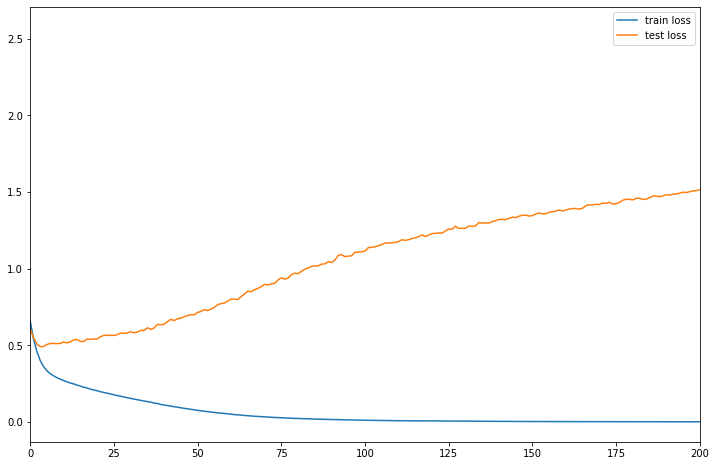

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(hist['loss'],label='train loss')
plt.plot(hist['val_loss'], label='test loss')
plt.legend()
plt.xlim([0,200])

(0.0, 200.0)

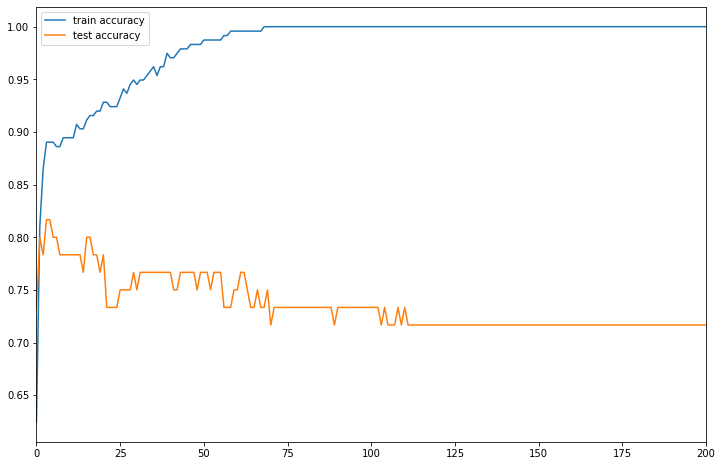

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(hist['accuracy'],label='train accuracy')
plt.plot(hist['val_accuracy'], label='test accuracy')
plt.legend()
plt.xlim([0,200])

## Early Stopping

In [ ]:
def build_model():
    model = tf.keras.Sequential([
                                layers.Dense(64,activation='relu',input_shape=[X.shape[1]]),
                                layers.Dense(64,activation='relu'),
                                layers.Dense(1,activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

model = build_model()

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                1216      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_std,y,epochs=1000,validation_split=0.2, callbacks=[early_stop])

Epoch 1/1000
8/8 [==============================] - 1s 26ms/step - loss: 0.6960 - accuracy: 0.5570 - val_loss: 0.6324 - val_accuracy: 0.6167
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.5684 - accuracy: 0.7637 - val_loss: 0.5768 - val_accuracy: 0.7167
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.4836 - accuracy: 0.8312 - val_loss: 0.5334 - val_accuracy: 0.7667
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.4211 - accuracy: 0.8608 - val_loss: 0.5072 - val_accuracy: 0.7667
Epoch 5/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.3757 - accuracy: 0.8734 - val_loss: 0.4950 - val_accuracy: 0.8000
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.3418 - accuracy: 0.8734 - val_loss: 0.4849 - val_accuracy: 0.7833
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.3207 - accuracy: 0.8903 - val_loss: 0.4822 - val_accuracy: 0.7833
Epoch 8/1000
8/8 [=

In [ ]:
history=history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

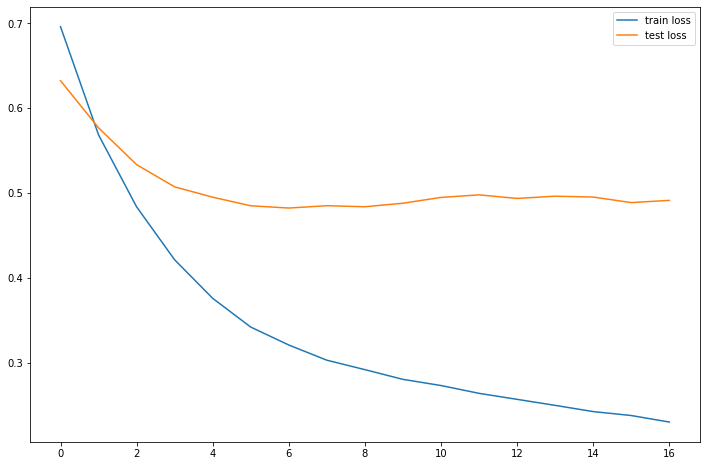

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history['loss'],label='train loss')
plt.plot(history['val_loss'], label='test loss')
plt.legend()

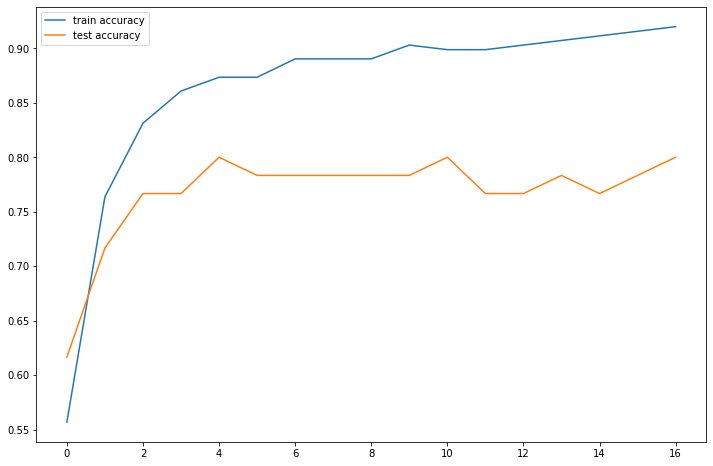

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history['accuracy'],label='train accuracy')
plt.plot(history['val_accuracy'], label='test accuracy')
plt.legend()